In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
stock = pd.read_csv('../data/low/SRF.csv')

In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1237 non-null   object 
 1   Close   1237 non-null   float64
 2   High    1237 non-null   float64
 3   Low     1237 non-null   float64
 4   Volume  1237 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.4+ KB


In [4]:
stock.head(20)

,Date,Close,High,Low,Volume
0,26/05/16,1235.65,1249.30,1226.00,230568.0
1,27/05/16,1260.55,1270.00,1229.40,144879.0
2,30/05/16,1302.65,1307.80,1265.65,273086.0
3,31/05/16,1297.10,1311.00,1286.00,293150.0
4,01/06/16,1287.85,1309.50,1267.15,140531.0
5,02/06/16,1285.90,1290.90,1261.55,126260.0
6,03/06/16,1254.85,1295.00,1250.00,82745.0
7,06/06/16,1263.85,1275.90,1239.70,62875.0
8,07/06/16,1264.75,1274.70,1251.75,118134.0
9,08/06/16,1257.00,1266.80,1250.70,41716.0


In [5]:
stock_close = stock[['Date','Close']]
stock_close = stock_close.set_index('Date')

In [6]:
ma_day = [20,50,100]

for ma in ma_day:
    column_name = "MA_%s" %(str(ma))
    stock_close[column_name] = stock_close['Close'].rolling(ma).mean()

In [7]:
stock_close['Daily Return'] = stock_close['Close'].pct_change()

In [8]:
stock_close['Volatility'] = stock_close['Daily Return'].rolling(window=252).std() * np.sqrt(252)

In [9]:
stock_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 26/05/16 to 26/05/21
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1237 non-null   float64
 1   MA_20         1218 non-null   float64
 2   MA_50         1188 non-null   float64
 3   MA_100        1138 non-null   float64
 4   Daily Return  1236 non-null   float64
 5   Volatility    985 non-null    float64
dtypes: float64(6)
memory usage: 67.6+ KB


In [10]:
stock_close.head(15)

,Close,MA_20,MA_50,MA_100,Daily Return,Volatility
Date,,,,,,
26/05/16,1235.65,NaN,NaN,NaN,NaN,NaN
27/05/16,1260.55,NaN,NaN,NaN,0.020151,NaN
30/05/16,1302.65,NaN,NaN,NaN,0.033398,NaN
31/05/16,1297.10,NaN,NaN,NaN,-0.004261,NaN
01/06/16,1287.85,NaN,NaN,NaN,-0.007131,NaN
02/06/16,1285.90,NaN,NaN,NaN,-0.001514,NaN
03/06/16,1254.85,NaN,NaN,NaN,-0.024147,NaN
06/06/16,1263.85,NaN,NaN,NaN,0.007172,NaN
07/06/16,1264.75,NaN,NaN,NaN,0.000712,NaN


<AxesSubplot:xlabel='Date'>

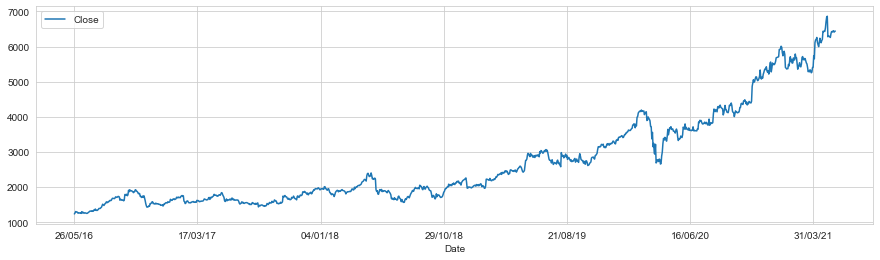

In [11]:
stock_close['Close'].plot(legend=True,figsize=(15,4))

<AxesSubplot:xlabel='Date'>

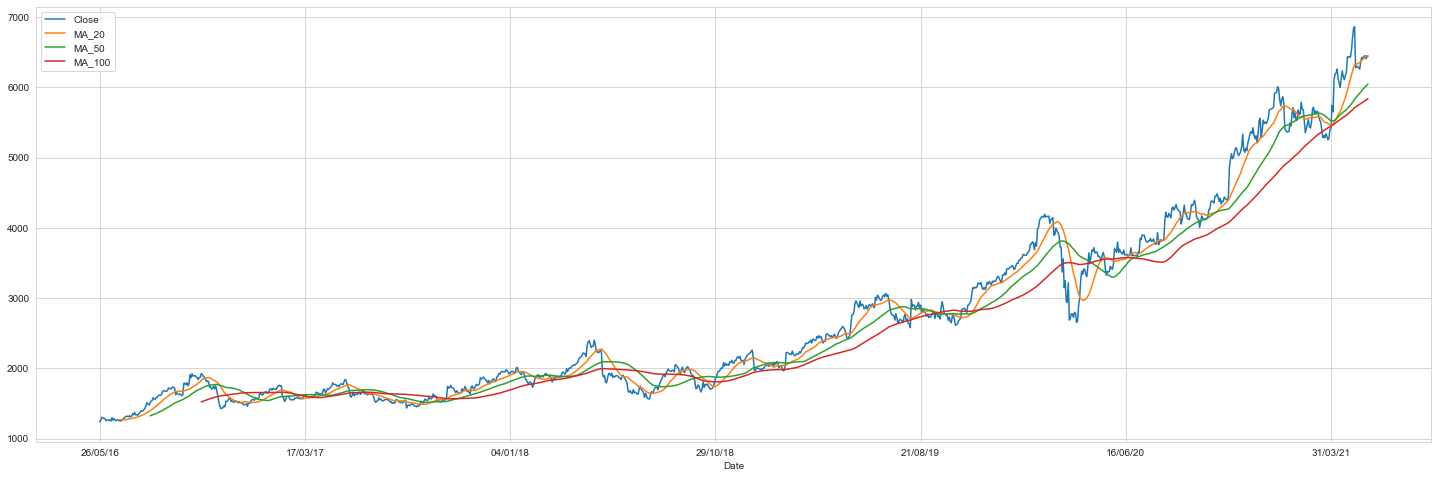

In [12]:
stock_close[['Close','MA_20','MA_50','MA_100']].plot(subplots=False,figsize=(25,8))

<AxesSubplot:xlabel='Date'>

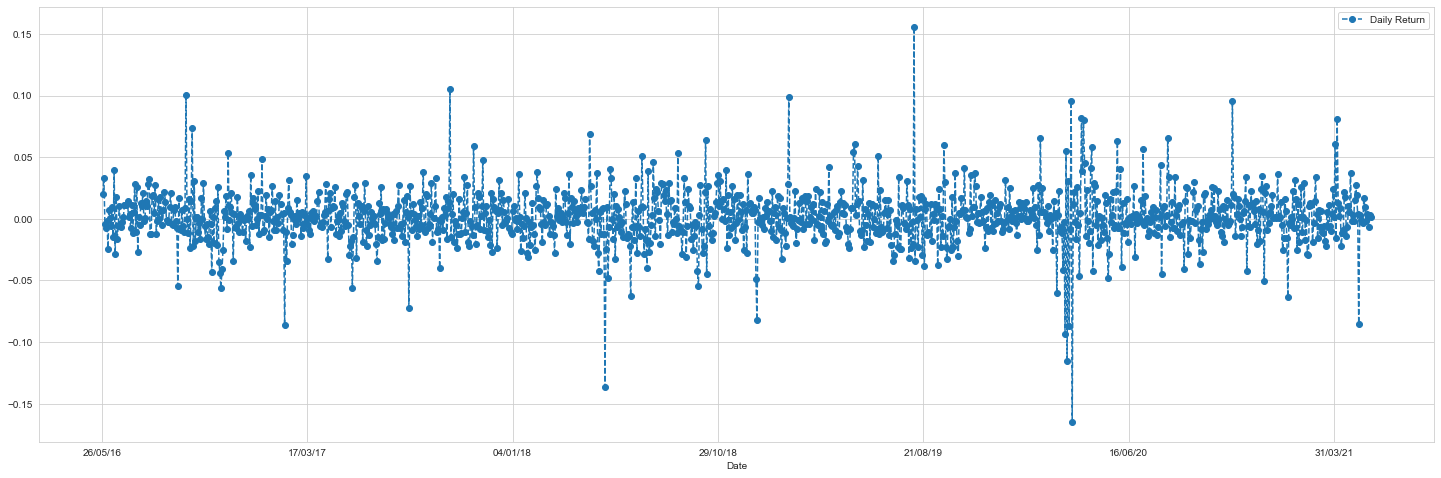

In [13]:
stock_close['Daily Return'].plot(figsize=(25,8),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

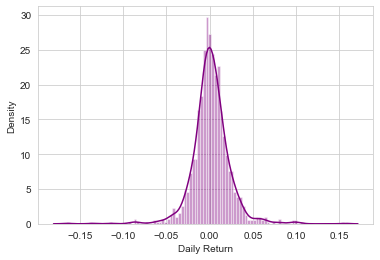

In [14]:
sns.distplot(stock_close['Daily Return'].dropna(),bins=100,color='purple')

array([<AxesSubplot:xlabel='Date'>], dtype=object)

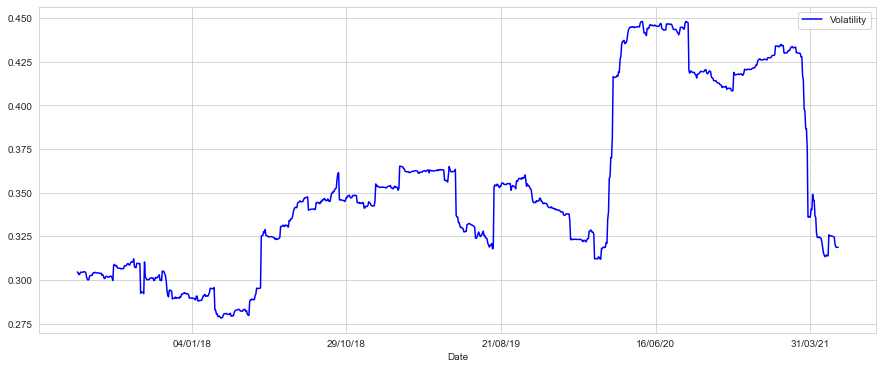

In [15]:
stock_close[['Volatility']].plot(subplots=True, color='blue',figsize=(15, 6))